In [1]:
import pandas as pd

In [4]:
d1_train, d1_test = (
    pd.read_csv(f'../pynlp/data/dataset1/{split}Data.csv', delimiter='\t')
    for split in ['train', 'test']
)
d2_train, d2_test = (
    pd.read_csv(f'../pynlp/data/dataset2/{split}Data.csv', delimiter='\t')
    for split in ['train', 'test']
)

In [8]:
d2_train.groupby('Label')[['Id']].count()

,Id
Label,
CAG,4240
NAG,5051
NOT,8840
OAG,2708
OFF,4400
hate,18695
noHate,16139


As both dataset 1 and dataset 2 are a combination of datasets annotated with different annotation schemes, some way to reconcile these different labels into a single annotation scheme is required. Consider for example, a non-offensive text '*I enjoy cycling*'. With the labels currently in place, all of `NAG`, `NOT` and `noHate` apply to this text, but only 1 would be 'correct'. Hence the following reconciliation scheme is used:

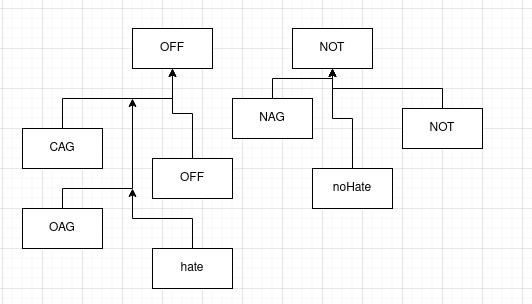

This essentially maps the labels to those proposed in Zampieri et al.

In [17]:
for i, (d_train, d_test) in enumerate([
    (d1_train, d1_test),
    (d2_train, d2_test)
]):
    for d in [d_train, d_test]:
        d['Label'] = d['Label'].replace({
            'CAG': 'OFF',
            'OAG': 'OFF',
            'OFF': 'OFF',
            'hate': 'OFF',
            'NAG': 'NOT',
            'noHate': 'NOT',
            'NOT': 'NOT'
        })
    
    d_train.to_csv(f'../pynlp/data/dataset{i+1}/trainData.csv', sep='\t', index=False)
    d_test.to_csv(f'../pynlp/data/dataset{i+1}/testData.csv', sep='\t', index=False)